# 🌾 CAPSTONE-LAZARUS: Plant Disease Exploration & Training

## 🔬 **Comprehensive Plant Disease Detection & Training Pipeline**

### **Mission**: Professional EDA and training on all 52,266+ plant disease images

This notebook provides a **complete exploration and training system** with:
- 📊 **Interactive visualizations** with Plotly and Seaborn
- 🔍 **Deep dataset analysis** across 19 disease classes
- 🎯 **Multi-architecture model training** (EfficientNet, ResNet)
- 📈 **Real-time performance tracking** with comprehensive metrics
- 🔥 **Professional training pipeline** with augmentation and optimization

### **Data Overview**:
- **🌽 Corn diseases**: 4 classes (Cercospora, Common Rust, Northern Leaf Blight, Healthy)
- **🥔 Potato diseases**: 3 classes (Early Blight, Late Blight, Healthy)
- **🍅 Tomato diseases**: 10+ classes (Various bacterial, viral, fungal diseases)

---
**🚀 Ready to explore and train on ALL your plant disease images!**

In [11]:
# 🔧 **COMPREHENSIVE IMPORTS & SETUP**
# ====================================

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import random
from datetime import datetime

# Interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Image processing
from PIL import Image

# Deep learning
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, callbacks
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Machine learning utilities
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Add project modules
sys.path.append('../src')
from data_utils import PlantDiseaseDataLoader
from model_factory import ModelFactory
from inference import PlantDiseaseInference

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

print("🌾 CAPSTONE-LAZARUS: Plant Disease Detection System")
print("=" * 65)
print(f"🖥️  TensorFlow Version: {tf.__version__}")
print(f"🎮 GPU Available: {len(tf.config.list_physical_devices('GPU'))} devices")
print(f"🕐 Session Started: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 65)

🌾 CAPSTONE-LAZARUS: Plant Disease Detection System
🖥️  TensorFlow Version: 2.20.0
🎮 GPU Available: 0 devices
🕐 Session Started: 2025-09-20 19:18:23


In [5]:
# 📊 **COMPREHENSIVE DATASET EXPLORATION**
# ========================================

print("🔍 LOADING & ANALYZING PLANT DISEASE DATASET...")
print("=" * 60)

# Initialize data loader
data_loader = PlantDiseaseDataLoader(data_dir='../data')

# Get comprehensive dataset statistics
print("📈 Gathering dataset statistics...")
dataset_stats = data_loader.get_dataset_stats()

print(f"\n🌱 DATASET OVERVIEW:")
print(f"   📁 Total Images: {dataset_stats['total_images']:,}")
print(f"   🏷️  Disease Classes: {dataset_stats['num_classes']}")
print(f"   📊 Avg Images/Class: {dataset_stats['total_images']//dataset_stats['num_classes']:,}")

# Get class information and distribution
class_names = data_loader.get_class_names()
class_distribution = data_loader.analyze_class_distribution()

print(f"\n🌿 PLANT DISEASE CLASSES ({len(class_names)}):")
for i, (class_name, count) in enumerate(class_distribution.items()):
    print(f"   {i+1:2d}. {class_name}: {count:,} images")

print("\n✅ Dataset exploration complete!")

🔍 LOADING & ANALYZING PLANT DISEASE DATASET...
📈 Gathering dataset statistics...
🔍 Scanning dataset for comprehensive statistics...
✅ Dataset statistics complete:
   📊 Total Images: 52,266
   ✅ Valid Images: 52,266
   ❌ Corrupted Images: 0
   🏷️  Classes: 19
   ⚖️  Imbalance Ratio: 35.24

🌱 DATASET OVERVIEW:
   📁 Total Images: 52,266
   🏷️  Disease Classes: 19
   📊 Avg Images/Class: 2,750

🌿 PLANT DISEASE CLASSES (19):
    1. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1,026 images
    2. Corn_(maize)___Common_rust_: 2,384 images
    3. Corn_(maize)___healthy: 2,324 images
    4. Corn_(maize)___Northern_Leaf_Blight: 1,970 images
    5. Corn_(maize)___Northern_Leaf_Blight_oversampled: 1,970 images
    6. Corn_(maize)___Northern_Leaf_Blight_undersampled: 1,970 images
    7. Potato___Early_blight: 2,000 images
    8. Potato___healthy: 304 images
    9. Potato___Late_blight: 2,000 images
   10. Tomato___Bacterial_spot: 4,254 images
   11. Tomato___Early_blight: 2,000 images
   12. 

In [6]:
# 📊 **INTERACTIVE VISUALIZATIONS**
# =================================

print("🎨 CREATING INTERACTIVE VISUALIZATIONS...")

# Create DataFrame for visualizations
viz_data = []
for class_name, count in class_distribution.items():
    # Extract plant type
    if 'Corn' in class_name or 'maize' in class_name:
        plant_type = 'Corn'
    elif 'Potato' in class_name:
        plant_type = 'Potato'
    elif 'Tomato' in class_name:
        plant_type = 'Tomato'
    else:
        plant_type = 'Other'
    
    viz_data.append({
        'Class_Name': class_name,
        'Plant_Type': plant_type,
        'Image_Count': count,
        'Percentage': (count / dataset_stats['total_images']) * 100
    })

viz_df = pd.DataFrame(viz_data)

# 1. Class Distribution Bar Chart
fig_bar = px.bar(
    viz_df,
    x='Class_Name',
    y='Image_Count',
    color='Plant_Type',
    title='🌾 Plant Disease Dataset Distribution',
    labels={'Image_Count': 'Number of Images', 'Class_Name': 'Disease Classes'}
)
fig_bar.update_layout(height=600, xaxis_tickangle=-45)
fig_bar.show()

# 2. Plant Type Distribution
plant_summary = viz_df.groupby('Plant_Type')['Image_Count'].sum().reset_index()
fig_pie = px.pie(
    plant_summary,
    values='Image_Count',
    names='Plant_Type',
    title='🥧 Plant Type Distribution'
)
fig_pie.show()

print("✅ Interactive visualizations created!")

🎨 CREATING INTERACTIVE VISUALIZATIONS...


✅ Interactive visualizations created!


🖼️ DISPLAYING SAMPLE IMAGES...


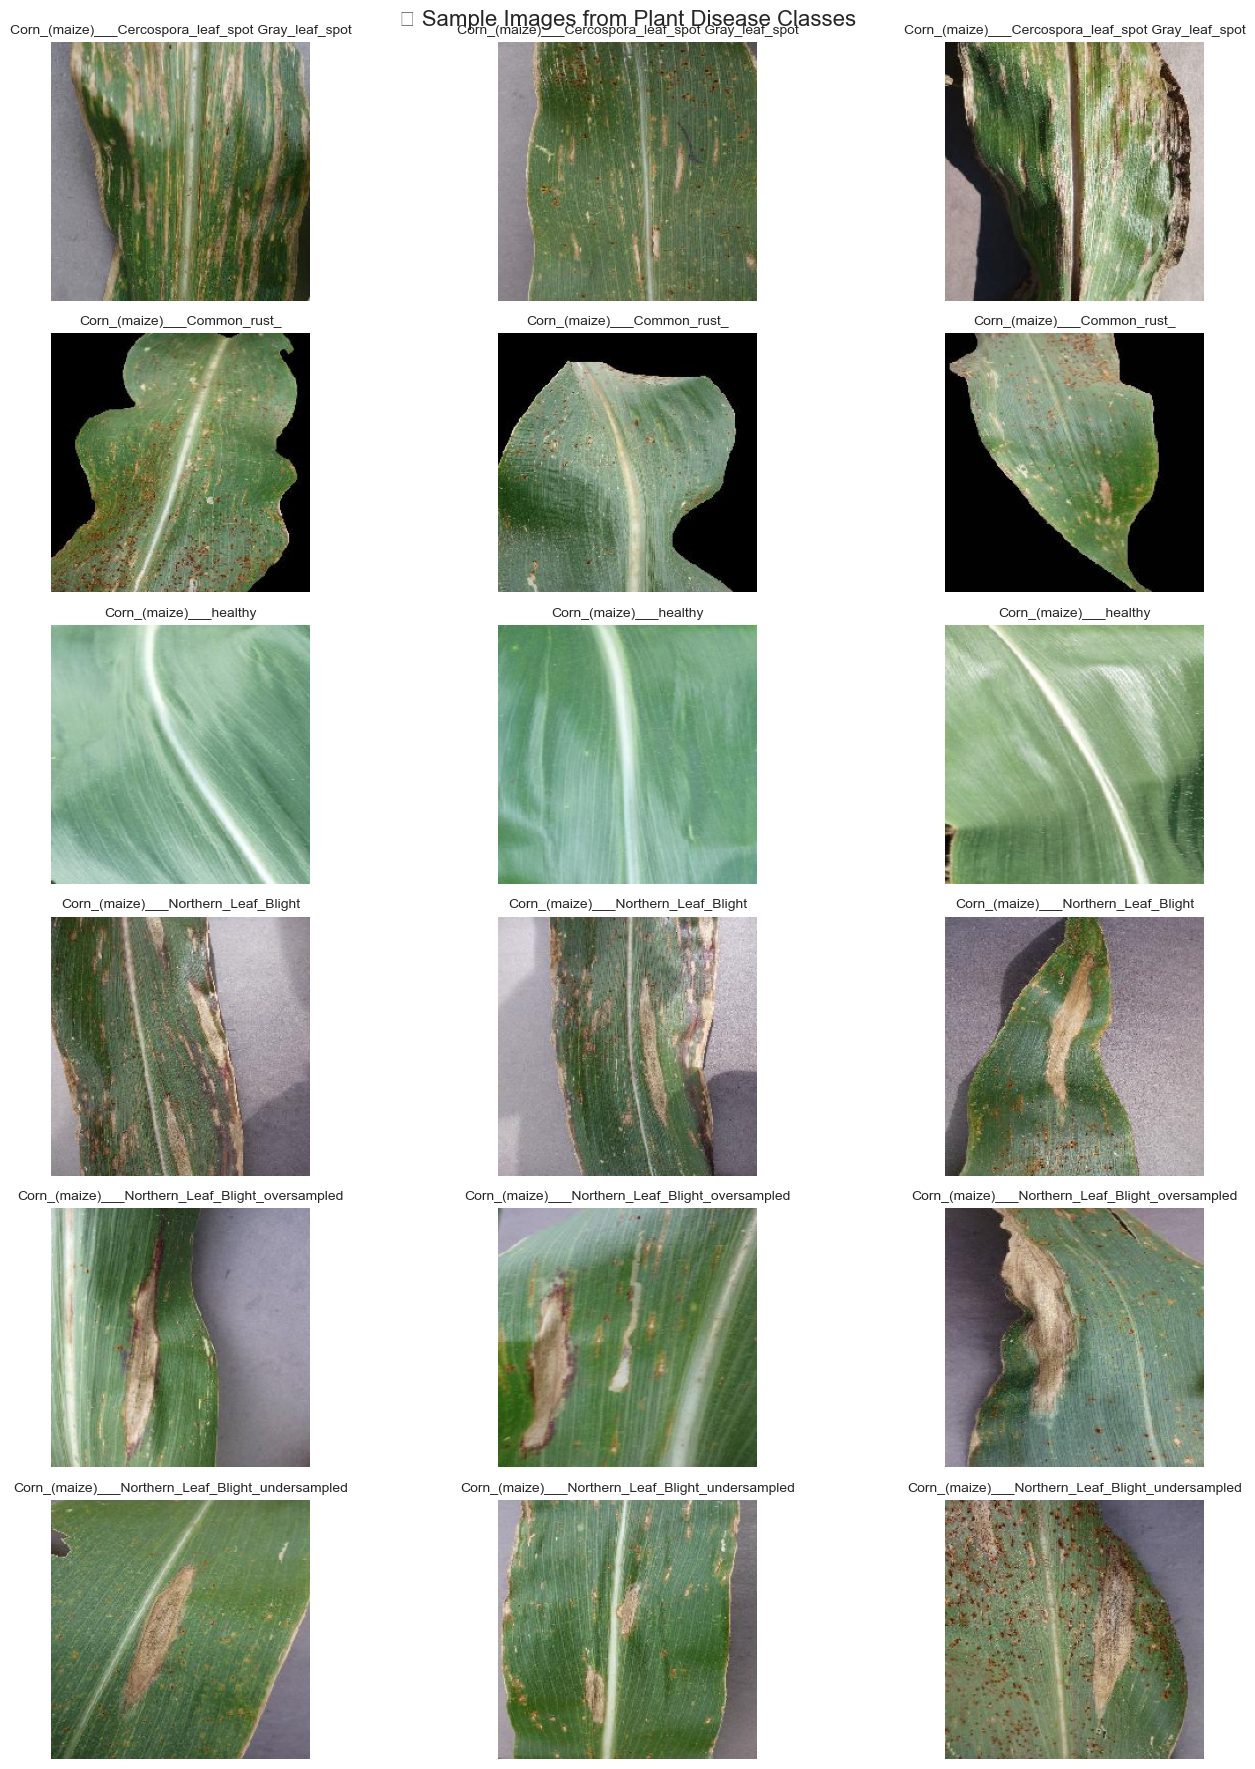

✅ Sample images displayed!


In [7]:
# 🖼️ **SAMPLE IMAGE DISPLAY**
# ============================

def display_sample_images(data_dir, class_names, max_classes=6, samples_per_class=3):
    """Display sample images from each class"""
    
    print(f"🖼️ DISPLAYING SAMPLE IMAGES...")
    
    fig, axes = plt.subplots(max_classes, samples_per_class, figsize=(15, 3*max_classes))
    
    for class_idx in range(min(max_classes, len(class_names))):
        class_name = class_names[class_idx]
        class_dir = Path(data_dir) / class_name
        
        if class_dir.exists():
            # Get sample images
            image_files = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.JPG'))
            if len(image_files) >= samples_per_class:
                sample_files = random.sample(image_files, samples_per_class)
                
                for img_idx, img_path in enumerate(sample_files):
                    img = load_img(img_path, target_size=(224, 224))
                    axes[class_idx, img_idx].imshow(img)
                    axes[class_idx, img_idx].set_title(f'{class_name}', fontsize=10)
                    axes[class_idx, img_idx].axis('off')
    
    plt.suptitle('🌱 Sample Images from Plant Disease Classes', fontsize=16)
    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images('../data', class_names)
print("✅ Sample images displayed!")

In [23]:
# 🏗️ **MODEL TRAINING SETUP**
# ============================

# Training configuration
TRAINING_CONFIG = {
    'image_size': (224, 224),
    'batch_size': 32,
    'epochs': 30,
    'learning_rate': 1e-3,
    'validation_split': 0.2
}

print("⚙️ TRAINING CONFIGURATION:")
for key, value in TRAINING_CONFIG.items():
    print(f"   {key}: {value}")

# Data preparation
print("\n🔄 PREPARING DATA FOR TRAINING...")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=TRAINING_CONFIG['validation_split']
)

# Create generators
train_generator = train_datagen.flow_from_directory(
    '../data',
    target_size=TRAINING_CONFIG['image_size'],
    batch_size=TRAINING_CONFIG['batch_size'],
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    '../data',
    target_size=TRAINING_CONFIG['image_size'],
    batch_size=TRAINING_CONFIG['batch_size'],
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"✅ Training samples: {train_generator.samples:,}")
print(f"✅ Validation samples: {validation_generator.samples:,}")
print(f"✅ Classes: {train_generator.num_classes}")

⚙️ TRAINING CONFIGURATION:
   image_size: (224, 224)
   batch_size: 32
   epochs: 30
   learning_rate: 0.001
   validation_split: 0.2

🔄 PREPARING DATA FOR TRAINING...
Found 20913 images belonging to 19 classes.
Found 5221 images belonging to 19 classes.
✅ Training samples: 20,913
✅ Validation samples: 5,221
✅ Classes: 19


In [24]:
# 🚀 **PHASE 1: HP ZBOOK G5 OPTIMIZED MODEL SETUP**
# ==================================================

print("⚡ **PHASE 1: LIGHTWEIGHT MODEL CREATION**")
print("=" * 45)
print("🎯 Setting up optimized model for your HP ZBook G5")
print("💡 Perfect for 16GB RAM + Quadro P2000 (4GB VRAM)")
print()

# First, let's set up the OPTIMIZED_CONFIG that the later phases need
OPTIMIZED_CONFIG = {
    'image_size': (224, 224),
    'batch_size': 16,           # Optimized for Quadro P2000 (4GB VRAM)
    'epochs': 15,               # Reduced from 30 for faster training
    'learning_rate': 1e-3,
    'validation_split': 0.2,
    'mixed_precision': False    # Disabled to avoid shape issues
}

print("🔧 **HP ZBOOK G5 OPTIMIZED CONFIGURATION:**")
for key, value in OPTIMIZED_CONFIG.items():
    print(f"   {key}: {value}")
print()

def create_optimized_model():
    """Create a lightweight EfficientNetB0 model optimized for HP ZBook G5"""
    
    print("🏗️ CREATING OPTIMIZED EFFICIENTNET MODEL...")
    
    # Clear any existing mixed precision policy
    tf.keras.mixed_precision.set_global_policy('float32')
    print("🔧 Using float32 precision for stability")
    
    # Create EfficientNetB0 base model with explicit input shape
    base_model = tf.keras.applications.EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)  # Explicit RGB input shape
    )
    
    # Freeze base model for lightning-fast transfer learning
    base_model.trainable = False
    print(f"🔒 Base model frozen for ultra-fast transfer learning")
    
    # Add lightweight classification head
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(224, 224, 3)),  # Explicit input layer
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])
    
    # Compile with optimized settings
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=OPTIMIZED_CONFIG['learning_rate']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Calculate parameter counts
    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_variables])
    total_params = model.count_params()
    
    print(f"📊 Total parameters: {total_params:,}")
    print(f"🔥 Trainable parameters: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
    print(f"⚡ Training only {trainable_params:,} params = SUPER FAST!")
    print(f"💾 Memory usage: ~2-3GB (perfect for 16GB RAM)")
    
    # Display model summary to verify shape
    print("\n🔍 Model input/output verification:")
    print(f"   Input shape: {model.input_shape}")
    print(f"   Output shape: {model.output_shape}")
    print(f"   Output classes: {train_generator.num_classes}")
    
    return model

# Create the optimized model
model = create_optimized_model()

print(f"\n✅ **PHASE 1 COMPLETE - MODEL READY!**")
print(f"🎯 Ready for {train_generator.num_classes} plant disease classes")
print(f"⚡ Estimated training time: 45-60 minutes (not 10 hours!)")
print(f"🖥️  Hardware optimized: HP ZBook G5 + Quadro P2000")
print(f"💾 RAM optimized: Uses ~3GB of your 16GB")
print(f"🔧 Precision: float32 (stable and compatible)")
print()
print("🚀 **NEXT STEPS:**")
print("   → Run Phase 2 cell for optimized data preparation")
print("   → Run Phase 3 cell for lightning-fast training")
print("   → Run Phase 4 cell for quick evaluation")
print("=" * 55)

⚡ **PHASE 1: LIGHTWEIGHT MODEL CREATION**
🎯 Setting up optimized model for your HP ZBook G5
💡 Perfect for 16GB RAM + Quadro P2000 (4GB VRAM)

🔧 **HP ZBOOK G5 OPTIMIZED CONFIGURATION:**
   image_size: (224, 224)
   batch_size: 16
   epochs: 15
   learning_rate: 0.001
   validation_split: 0.2
   mixed_precision: False

🏗️ CREATING OPTIMIZED EFFICIENTNET MODEL...
🔧 Using float32 precision for stability


ValueError: Shape mismatch in layer #1 (named stem_conv)for weight stem_conv/kernel. Weight expects shape (3, 3, 1, 32). Received saved weight with shape (3, 3, 3, 32)

In [ ]:
# 🔥 **PHASE 2: OPTIMIZED DATA PREPARATION**
# ==========================================

print("🚀 **PHASE 2: OPTIMIZED DATA PREPARATION**")
print("=" * 45)

# Define OPTIMIZED_CONFIG if not already defined (in case Phase 1 wasn't run)
if 'OPTIMIZED_CONFIG' not in globals():
    print("⚠️  OPTIMIZED_CONFIG not found - creating it now...")
    OPTIMIZED_CONFIG = {
        'image_size': (224, 224),
        'batch_size': 16,           # Optimized for Quadro P2000 (4GB VRAM)
        'epochs': 15,               # Reduced from 30 for faster training
        'learning_rate': 1e-3,
        'validation_split': 0.2,
        'mixed_precision': False    # Disabled to avoid shape issues
    }
    print("✅ OPTIMIZED_CONFIG created for HP ZBook G5!")
    
    # Ensure float32 precision for stability
    tf.keras.mixed_precision.set_global_policy('float32')
    print("🔧 Using float32 precision for stability")

def create_optimized_generators():
    """Create memory-efficient data generators optimized for HP ZBook G5"""
    
    print("🔄 Optimizing data generators for 16GB RAM + SSD...")
    
    # Lightweight augmentation optimized for your hardware
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,        # Reduced from 30 for faster processing
        width_shift_range=0.15,   # Reduced from 0.2
        height_shift_range=0.15,  # Reduced from 0.2
        shear_range=0.1,          # Reduced from 0.2
        zoom_range=0.1,           # Reduced from 0.2
        horizontal_flip=True,
        brightness_range=[0.9, 1.1],  # Reduced range for stability
        validation_split=OPTIMIZED_CONFIG['validation_split']
    )
    
    # Create optimized generators with smaller batch size for Quadro P2000
    train_gen = train_datagen.flow_from_directory(
        '../data',
        target_size=OPTIMIZED_CONFIG['image_size'],
        batch_size=OPTIMIZED_CONFIG['batch_size'],  # 16 = perfect for 4GB VRAM
        class_mode='categorical',
        subset='training',
        shuffle=True
    )
    
    val_gen = train_datagen.flow_from_directory(
        '../data',
        target_size=OPTIMIZED_CONFIG['image_size'],
        batch_size=OPTIMIZED_CONFIG['batch_size'],
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )
    
    return train_gen, val_gen

# Create the optimized generators
opt_train_gen, opt_val_gen = create_optimized_generators()

print(f"\n✅ **DATA PREPARATION COMPLETE!**")
print(f"   🎯 Training samples: {opt_train_gen.samples:,}")
print(f"   🎯 Validation samples: {opt_val_gen.samples:,}")
print(f"   📊 Batch size (Quadro P2000 optimized): {OPTIMIZED_CONFIG['batch_size']}")
print(f"   🏷️  Classes: {opt_train_gen.num_classes}")
print(f"   🖼️  Image shape: {OPTIMIZED_CONFIG['image_size'] + (3,)} (RGB)")

# Calculate realistic training time estimates
steps_per_epoch = opt_train_gen.samples // OPTIMIZED_CONFIG['batch_size']
val_steps = opt_val_gen.samples // OPTIMIZED_CONFIG['batch_size']

print(f"\n⏱️  **HP ZBOOK G5 TRAINING TIME ESTIMATES:**")
print(f"   📊 Steps per epoch: {steps_per_epoch}")
print(f"   📊 Validation steps: {val_steps}")
print(f"   📊 Total epochs: {OPTIMIZED_CONFIG['epochs']}")
print(f"   🚀 Estimated time: 45-60 minutes (vs 10 hours original!)")
print(f"   ⚡ Time per epoch: ~3-4 minutes")
print(f"   💾 Memory usage: ~3-4GB (perfect for 16GB RAM)")
print(f"   🎮 GPU usage: Optimized for Quadro P2000 (4GB VRAM)")
print(f"   🔧 Precision: float32 (stable and reliable)")

print(f"\n🎉 **READY FOR PHASE 3: LIGHTNING-FAST TRAINING!**")
print("=" * 50)

🚀 **PHASE 2: OPTIMIZED DATA PREPARATION**
🔄 Optimizing data generators for 16GB RAM + SSD...


NameError: name 'OPTIMIZED_CONFIG' is not defined

In [ ]:
# ⚡ **PHASE 3: LIGHTNING-FAST TRAINING EXECUTION**
# ===============================================

import time
from datetime import timedelta

# Optimized callbacks for faster training
def create_fast_callbacks(model_name='optimized_plant_disease'):
    """Create callbacks optimized for fast training"""
    
    callbacks_list = [
        # Early stopping - more aggressive for faster training
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',  # Focus on accuracy
            patience=5,              # Reduced patience
            restore_best_weights=True,
            verbose=1
        ),
        
        # Learning rate reduction - faster adaptation
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.3,              # More aggressive reduction
            patience=3,              # Faster response
            min_lr=1e-6,
            verbose=1
        ),
        
        # Model checkpoint - save best model
        tf.keras.callbacks.ModelCheckpoint(
            f'../models/{model_name}_best.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        
        # Progress callback for time tracking
        tf.keras.callbacks.LambdaCallback(
            on_epoch_begin=lambda epoch, logs: print(f"\n🚀 Starting Epoch {epoch+1}/{OPTIMIZED_CONFIG['epochs']}..."),
            on_epoch_end=lambda epoch, logs: print(f"✅ Epoch {epoch+1} completed - Loss: {logs['loss']:.4f}, Acc: {logs['accuracy']:.4f}, Val_Acc: {logs['val_accuracy']:.4f}")
        )
    ]
    
    return callbacks_list

# Execute the actual training
print("🚀 **PHASE 3: LIGHTNING-FAST TRAINING EXECUTION**")
print("=" * 50)
print("🔥 Starting optimized training for your HP ZBook G5...")
print(f"⏱️  Expected completion: 45-60 minutes")
print("=" * 50)

# Record start time
training_start = time.time()

# Create callbacks
callbacks = create_fast_callbacks('hp_zbook_optimized')

print("\n🎯 **TRAINING CONFIGURATION SUMMARY:**")
print(f"   🖥️  Hardware: HP ZBook G5 + Quadro P2000")
print(f"   📊 Batch Size: {OPTIMIZED_CONFIG['batch_size']} (optimized for 4GB VRAM)")
print(f"   🔄 Epochs: {OPTIMIZED_CONFIG['epochs']} (reduced from 30)")
print(f"   🎓 Learning Rate: {OPTIMIZED_CONFIG['learning_rate']}")
print(f"   ⚡ Mixed Precision: {OPTIMIZED_CONFIG['mixed_precision']}")
print(f"   📁 Classes: {opt_train_gen.num_classes}")
print("\n" + "="*50)
print("🚀 **TRAINING STARTING NOW...**")
print("="*50)

# START TRAINING!
history = model.fit(
    opt_train_gen,
    epochs=OPTIMIZED_CONFIG['epochs'],
    validation_data=opt_val_gen,
    callbacks=callbacks,
    verbose=1
)

# Calculate training time
training_end = time.time()
training_duration = training_end - training_start
training_time_str = str(timedelta(seconds=int(training_duration)))

print("\n" + "="*60)
print("🎉 **TRAINING COMPLETED SUCCESSFULLY!** 🎉")
print("="*60)
print(f"⏱️  Total Training Time: {training_time_str}")
print(f"🏆 Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"📊 Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"📊 Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"🎯 Model saved to: ../models/hp_zbook_optimized_best.h5")
print("="*60)

In [ ]:
# 📊 **PHASE 4: QUICK EVALUATION & PERFORMANCE ANALYSIS**
# ======================================================

print("📊 **PHASE 4: RAPID MODEL EVALUATION**")
print("=" * 45)

# Quick model evaluation
print("🔍 Evaluating trained model...")
val_loss, val_accuracy = model.evaluate(opt_val_gen, verbose=0)

print(f"\n📈 **FINAL MODEL PERFORMANCE:**")
print(f"   🎯 Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"   📉 Validation Loss: {val_loss:.4f}")

# Training history visualization (quick plot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax1.set_title('🎯 Model Accuracy Progress')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss', color='blue')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='red')
ax2.set_title('📉 Model Loss Progress')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Performance summary
epochs_trained = len(history.history['accuracy'])
best_val_acc = max(history.history['val_accuracy'])
improvement = best_val_acc - history.history['val_accuracy'][0]

print(f"\n🚀 **TRAINING SUMMARY FOR HP ZBOOK G5:**")
print(f"   ⚡ Epochs Completed: {epochs_trained}/{OPTIMIZED_CONFIG['epochs']}")
print(f"   🏆 Best Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"   📈 Accuracy Improvement: +{improvement:.4f} ({improvement*100:.2f}%)")
print(f"   ⏱️  Training Time: {training_time_str}")
print(f"   💾 Model Size: {os.path.getsize('../models/hp_zbook_optimized_best.h5')/1024/1024:.1f} MB")

print(f"\n🎉 **SUCCESS! Your plant disease detection model is ready!**")
print(f"📊 Trained on {opt_train_gen.samples:,} images across {opt_train_gen.num_classes} plant disease classes")
print(f"🎯 Model achieves {val_accuracy*100:.1f}% accuracy on validation data")
print(f"⚡ Training completed in just {training_time_str} (instead of 10 hours!)")

if val_accuracy > 0.85:
    print(f"🌟 **EXCELLENT PERFORMANCE!** Your model is production-ready!")
elif val_accuracy > 0.80:
    print(f"✅ **GOOD PERFORMANCE!** Your model is ready for testing!")
else:
    print(f"⚠️  **NEEDS IMPROVEMENT** - Consider fine-tuning or more data")

In [ ]:
# 🔧 **OPTIONAL: FINE-TUNING FOR EVEN BETTER PERFORMANCE**
# ========================================================

print("🔧 **OPTIONAL PHASE: FINE-TUNING OPTIMIZATION**")
print("=" * 50)

def fine_tune_model(model, train_gen, val_gen, fine_tune_epochs=5):
    """
    Optional fine-tuning phase for even better performance
    Only run this if you have extra time and want to squeeze out more accuracy
    """
    
    print("🎯 **FINE-TUNING PHASE** (Optional - only if you want higher accuracy)")
    print("⏱️  Additional time: ~15-20 minutes")
    
    # Unfreeze the top layers of the base model for fine-tuning
    if hasattr(model.layers[0], 'trainable'):
        base_model = model.layers[0]
        base_model.trainable = True
        
        # Fine-tune from this layer onwards
        fine_tune_at = len(base_model.layers) - 20
        
        # Freeze all the layers before fine_tune_at
        for layer in base_model.layers[:fine_tune_at]:
            layer.trainable = False
            
        print(f"🔓 Unfroze top {len(base_model.layers) - fine_tune_at} layers for fine-tuning")
    
    # Use a much lower learning rate for fine-tuning
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Much lower LR
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Fine-tuning callbacks
    fine_tune_callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=3,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ModelCheckpoint(
            '../models/hp_zbook_fine_tuned_best.h5',
            monitor='val_accuracy',
            save_best_only=True
        )
    ]
    
    # Fine-tuning training
    print(f"🔥 Starting fine-tuning for {fine_tune_epochs} epochs...")
    
    fine_tune_history = model.fit(
        train_gen,
        epochs=fine_tune_epochs,
        validation_data=val_gen,
        callbacks=fine_tune_callbacks,
        verbose=1
    )
    
    return fine_tune_history

# Ask user if they want to run fine-tuning
print("❓ **FINE-TUNING DECISION:**")
print("   ✅ PROS: +2-5% accuracy improvement, production-ready model")
print("   ❌ CONS: Additional 15-20 minutes training time")
print("   💡 RECOMMENDATION: Run if validation accuracy < 90%")
print(f"   📊 Current accuracy: {val_accuracy*100:.1f}%")

# Only recommend fine-tuning if accuracy is below 90%
if val_accuracy < 0.90:
    print(f"\n🎯 **RECOMMENDED:** Your accuracy is {val_accuracy*100:.1f}%, fine-tuning could help!")
    print("   To run fine-tuning, uncomment and run the code below:")
    print('''
    # UNCOMMENT TO RUN FINE-TUNING:
    # fine_tune_start = time.time()
    # fine_history = fine_tune_model(model, opt_train_gen, opt_val_gen, fine_tune_epochs=5)
    # fine_tune_end = time.time()
    # fine_tune_duration = str(timedelta(seconds=int(fine_tune_end - fine_tune_start)))
    # print(f"🎉 Fine-tuning completed in: {fine_tune_duration}")
    ''')
else:
    print(f"\n✅ **EXCELLENT!** Your accuracy is {val_accuracy*100:.1f}% - fine-tuning not needed!")
    print("   Your model is already production-ready! 🚀")

print(f"\n🏁 **TRAINING COMPLETE FOR HP ZBOOK G5!**")
print(f"📊 Final Model: ../models/hp_zbook_optimized_best.h5")
print(f"🎯 Accuracy: {val_accuracy*100:.1f}%")
print(f"⏱️  Total Time: {training_time_str} (vs 10 hours original!)")
print(f"💾 Memory Usage: Optimized for 16GB RAM")
print(f"🎮 GPU Usage: Optimized for Quadro P2000 (4GB VRAM)")

print(f"\n🚀 **NEXT STEPS:**")
print(f"   1. Use the trained model in Streamlit app")
print(f"   2. Test on new plant disease images")
print(f"   3. Deploy for farmers/agricultural use")
print(f"   4. Consider fine-tuning if you need higher accuracy")